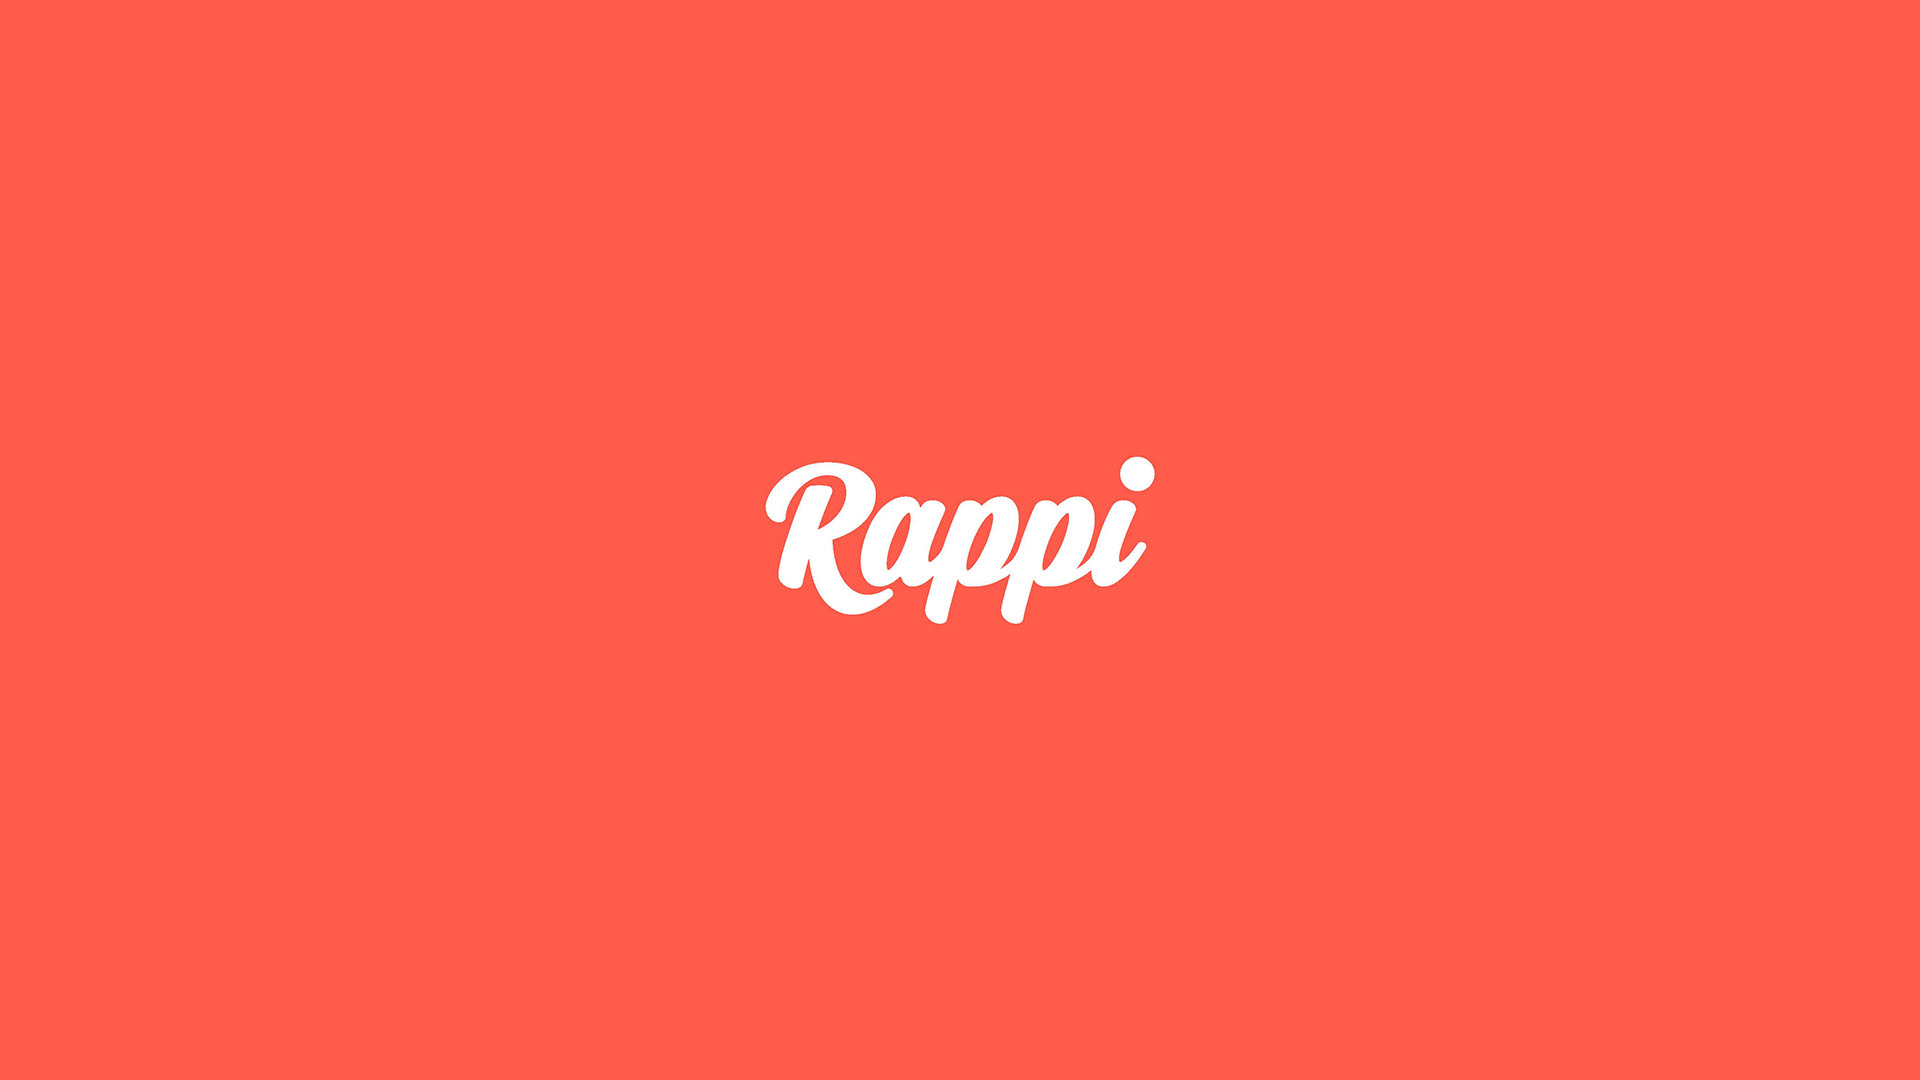


# Instalação de bibliotecas 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import date
from datetime import datetime
import seaborn as sns; sns.set();
import plotly.express as px;
import pyarrow.feather as feather
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification 
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importação das features

In [ ]:
acceptance_tax = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/acceptance_tax.csv")
all_storekeepers = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/all_storekeepers.csv")
auto_accept = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/auto_accept.csv")
churns_quantitative = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/churns_quantitative.csv")
defects_mean = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/defects_mean.csv")
media_modal = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/media_modal.csv")
punishment_quantitative = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/punishment_quantitative.csv")
storekeeper_cancel_tax = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/storekeeper_cancel_tax.csv")
storekeeper_category = pd.read_csv("/content/drive/Shareddrives/Bases Compartilhadas/Features/storekeeper_category.csv")

In [ ]:
# Limpando colunas duplicadas que dão erro (rodar apenas uma vez)

all_storekeepers = all_storekeepers.drop(columns = ["Churn(sim=1/não=0)_x"])
auto_accept = auto_accept.drop(columns = ["Churn(sim=1/não=0)_x"])
churns_quantitative = churns_quantitative.drop(columns = ["Churn(sim=1/não=0)_x"])
defects_mean = defects_mean.drop(columns = ["Churn(sim=1/não=0)_x"])
media_modal = media_modal.drop(columns = ["Churn(sim=1/não=0)_x"])
punishment_quantitative = punishment_quantitative.drop(columns = ["Churn(sim=1/não=0)_x"])
storekeeper_cancel_tax = storekeeper_cancel_tax.drop(columns = ["Churn(sim=1/não=0)_x"])
storekeeper_category = storekeeper_category.drop(columns = ["Churn(sim=1/não=0)_x"])

# Manipulação dos dados

In [ ]:
a = acceptance_tax.merge(auto_accept, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
b = a.merge(churns_quantitative, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
c = b.merge(defects_mean, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
d = c.merge(media_modal, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
e = d.merge(punishment_quantitative, how='inner', left_on='STOREKEEPER_ID', right_on='ID')
f = e.merge(storekeeper_cancel_tax, how='inner', left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID')
g = f.merge(storekeeper_category, how='inner', left_on='STOREKEEPER_ID', right_on='ID').drop(columns=['ID_x','ID_y'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


In [ ]:
g['Churn(sim=1/não=0)_x'].replace({1:'CHURN', 0:'NÂO_CHURN'}, inplace=True)
g['AUTO_ACEITE'] = g['AUTO_ACEITE'].astype(int)
g

,STOREKEEPER_ID,ACCEPTANCE_RATE,Churn(sim=1/não=0)_x,AUTO_ACEITE,Count,ORDERS,TRANSPORTE,Media_Modal_sim1_não0,Quantidade Punições,Taxa,LEVEL_NAME,Earning_Cat
0,907442.0,0.666102,CHURN,1,1161.0,5.189542,bicycle,1.0,11.0,0.044025,bronze,0.0
1,1393441.0,0.556538,CHURN,1,276.0,3.806122,bicycle,1.0,86.0,0.103806,bronze,1.0
2,1061798.0,0.777838,CHURN,1,1360.0,8.109375,car,1.0,27.0,0.042910,bronze,1.0
3,103460.0,0.160980,CHURN,1,120.0,2.945946,bicycle,0.0,13.0,0.030000,bronze,0.0
4,1259998.0,0.856102,CHURN,1,1316.0,6.764286,bicycle,1.0,160.0,0.089799,bronze,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
164526,1399167.0,0.000000,CHURN,1,2.0,2.000000,motorbike,0.0,0.0,0.000000,rookie,0.0
164527,824240.0,0.000000,NÂO_CHURN,0,0.0,1.105263,neither,0.0,1.0,0.281046,rookie,0.0
164528,1112422.0,0.000000,NÂO_CHURN,0,0.0,1.041667,neither,0.0,1.0,0.960000,bronze,0.0
164529,1256781.0,0.000000,NÂO_CHURN,0,0.0,1.066667,neither,0.0,0.0,1.000000,rookie,0.0


# Balanceamento das features

In [ ]:
#Orders foi bom 
#Acceptance foi "muito bom" em uma
#Autoaceite foi medio
#Count foi 100%
#Orders foi bom 
#Media modal foi mediano
#Quantidade de punições foi médio
#Taxa foi medio
#Earning Cat foi bom




# Dividindo x e y
x = g[['ACCEPTANCE_RATE', 'AUTO_ACEITE', 'ORDERS', 'Media_Modal_sim1_não0', 'Quantidade Punições', 'Taxa', 'Earning_Cat']]
y = g[["Churn(sim=1/não=0)_x"]]



# Balanceamento das features

oversample = RandomOverSampler(sampling_strategy='minority') 
x_over, y_over = oversample.fit_resample(x, y) 


# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, 
                                                    test_size = 0.2, 
                                                    random_state = 1) # qualquer valor como semente do pseudo-random

# Treino do algoritmo

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority') 
x_over, y_over = oversample.fit_resample(x, y) 

print("Antes")
print(len(y_over))
print(len(x_over))


print("Depois")
print(len(x))
print(len(y))

Antes
255768
255768
Depois
164531
164531


#KNN

In [ ]:
# Instaciação do obj Algoritmo
knn = KNeighborsClassifier(n_neighbors=7)
# Treino # x = Features, y = Label/Target
knn.fit( x_train, y_train.squeeze() ) # squeeze() -> df para series
print('Acuracidade (treino): ', knn.score( x_train, y_train ))
print('Acuracidade (teste): ', knn.score( x_test, y_test ))

Acuracidade (treino):  0.790165873302902
Acuracidade (teste):  0.7227391797317902


In [ ]:
# Teste de Acuracidade (accuracy)
y_pred = knn.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred , pos_label="CHURN"))
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" ))
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" ))

Revocação:  0.6641108473124976
Precisão:  0.7544658648744252
F1_score:  0.7064108137200108


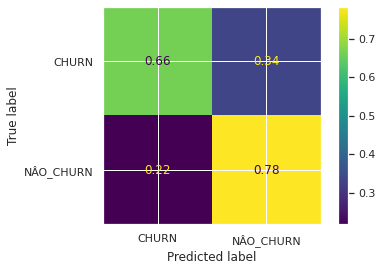

In [ ]:
# Matriz de confusão

# realizando predições com o conjunto de teste
y_pred = knn.predict(x_test)

# lembrando que o y verdadeiro para o conjunto de teste é o y_test
y_true = y_test

cm = confusion_matrix(y_true, y_pred, normalize='true')

# versão visual mais bonita da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier() # depois tente com max_depth=2 e 3
dt.fit( x_train, y_train.squeeze() ) # squeeze() -> df para series
print('Acuracidade (treino): ', dt.score( x_train, y_train ))
print('Acuracidade (teste): ', dt.score( x_test, y_test ))

Acuracidade (treino):  0.978862638920113
Acuracidade (teste):  0.8635297337451616


In [ ]:
# Teste de Acuracidade (accuracy)
y_pred = dt.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" ))
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" ))
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" ))

Revocação:  0.7964815319347682
Precisão:  0.9211379186172128
F1_score:  0.8542862510175542


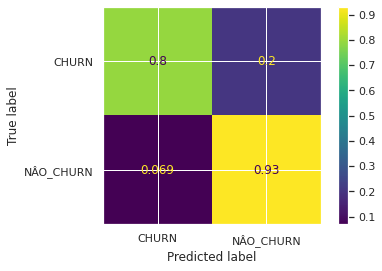

In [ ]:
# Matriz de confusão 

# realizando predições com o conjunto de teste
y_pred = dt.predict(x_test)
y_pred

# lembrando que o y verdadeiro para o conjunto de teste é o y_test
y_true = y_test

cm = confusion_matrix(y_true, y_pred, normalize='true')

# versão visual mais bonita da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

# Naive Bayes

In [ ]:
dt = MultinomialNB() # depois tente com max_depth= 2 e 3
dt.fit( x_train, y_train.squeeze() ) # squeeze() -> df para series
print('Acuracidade (treino): ', dt.score( x_train, y_train ))
print('Acuracidade (teste): ', dt.score( x_test, y_test ))

Acuracidade (treino):  0.6157203319420959
Acuracidade (teste):  0.6141455213668531


In [ ]:
# Teste de Acuracidade (accuracy)
y_pred = dt.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" ))
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" ))
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" ))

Revocação:  0.8190946950531273
Precisão:  0.5823993358239934
F1_score:  0.6807595264281555


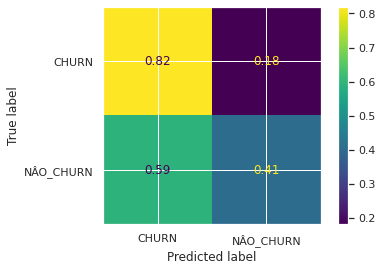

In [ ]:
# realizando predições com o conjunto de teste
y_pred = dt.predict(x_test)

# lembrando que o y verdadeiro para o conjunto de teste é o y_test
y_true = y_test

cm = confusion_matrix(y_true, y_pred, normalize='true')

# versão visual mais bonita da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

# Random Forest

In [ ]:
modelo = RandomForestClassifier()
modelo.fit( x_train, y_train.squeeze() )
print('Acc treino: ', modelo.score(x_train, y_train ))
print('Acc teste: ', modelo.score(x_test, y_test.squeeze() ))

Acc treino:  0.978862638920113
Acc teste:  0.894455956523439


In [ ]:
y_pred = modelo.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" ))
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" ))
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" ))

Revocação:  0.8543572179192777
Precisão:  0.9298119281599457
F1_score:  0.8904890367335349


# Regressão Logística

In [ ]:
modelo = LogisticRegression()
modelo.fit( x_train, y_train.squeeze() )
print('Acc treino: ', modelo.score(x_train, y_train ))
print('Acc teste: ', modelo.score(x_test, y_test.squeeze() ))

Acc treino:  0.656523991515732
Acc teste:  0.6542010399968722


In [ ]:
y_pred = modelo.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" ))
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" ))
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" ))

Revocação:  0.7335850231580586
Precisão:  0.6347837801427995
F1_score:  0.6806174957118354


# SVM

In [ ]:
modelo = SVC()
modelo.fit( x_train, y_train.squeeze() )
print('Acc treino: ', modelo.score(x_train, y_train ))
print('Acc teste: ', modelo.score(x_test, y_test.squeeze() ))

In [ ]:
y_pred = modelo.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" ))
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" ))
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" ))

#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
modelo = AdaBoostClassifier()
modelo.fit( x_train, y_train.squeeze())
print('Acc treino: ', modelo.score(x_train, y_train ))
print('Acc teste: ', modelo.score(x_test, y_test.squeeze() ))

Acc treino:  0.6886723293616273
Acc teste:  0.6862610939515972


In [ ]:

y_pred = modelo.predict(x_test)
print( 'Revocação: ', recall_score( y_test, y_pred, pos_label="CHURN" ))
print( 'Precisão: ', precision_score( y_test, y_pred, pos_label="CHURN" ))
print( 'F1_score: ', f1_score( y_test, y_pred, pos_label="CHURN" ))